<a href="https://colab.research.google.com/github/abhishekmohank/Bill-Text-Extractor-using-PaddleOCR/blob/main/Data_from_Bill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install paddlepaddle
!pip install "paddleocr>=2.0.1"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 100.2 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=b76fa2a4a0a96254b8163632820ac06da7b776d2bf32d889cf0c41d8a32a4dcf
  Stored

In [14]:
!apt-get install -y fonts-dejavu-core


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-dejavu-core
0 upgraded, 1 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,041 kB of archives.
After this operation, 3,025 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Fetched 1,041 kB in 1s (772 kB/s)
Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 126213 files and directories currently installed.)
Preparing to unpack .../fonts-dejavu-core_2.37-2build1_all.deb ...
Unpacking fonts-dejavu-core (2.37-2build1) ...
Setting up fonts-dejavu-core (2.37-2build1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


Saving 49Bill.jpg to 49Bill (4).jpg
[2025/04/09 07:30:48] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 4

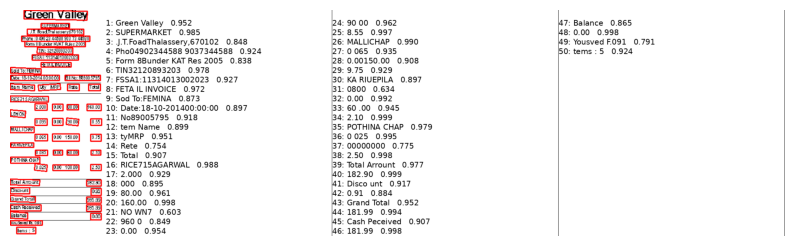

In [15]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Initialize OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')
result = ocr.ocr(img_path, cls=True)

# Display detected text
print("Detected Text:\n")
for line in result[0]:
    print(line[1][0])

# Load image
image = Image.open(img_path).convert('RGB')

# Extract text boxes, text, and confidence scores
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Install and use a known good font
!apt-get install -y fonts-dejavu-core
font_path = "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf"

# Draw results
im_show = draw_ocr(image, boxes, txts, scores, font_path=font_path)

# Show the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(im_show)
plt.axis('off')
plt.show()
